In [24]:
library(tidyverse)
library(lubridate)
options(repr.plot.width=8, repr.plot.height=5)

# Lecture 12: Importing data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand how to import data from CSV files and Excel spreadsheets.
</div>

These notes correspond to Chapters 8 and 22 of your book.


## Types of data
You will encounter data in many different formats. Here are a few of the most common ones:

### Comma-separated value data
Comma-separated value (CSV) is one of the most common formats for sharing data. It has the advantage of being human-readable. The disadvantage is that there is no actual standard for reading or writing these files!

Here's an example of CSV data on heights, education, and earnings:
    
    "earn","height","sex","ed","age","race"
    50000,74.4244387818035,"male",16,45,"white"
    60000,65.5375428255647,"female",16,58,"white"
    30000,63.6291977374349,"female",16,29,"white"
    50000,63.1085616752971,"female",16,91,"other"
    51000,63.4024835710879,"female",17,39,"white"
    9000,64.3995075440034,"female",15,26,"white"
    
The first row (usually) has a *header* giving the column names. Subsequent rows give the actual data. Strings are (usually) quoted.

You might also see these data come in the format:
    
    earn,height,sex,ed,age,race
    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No quotes!

Or even:

    50000,74.4244387818035,male,16,45,white
    60000,65.5375428255647,female,16,58,white
    30000,63.6291977374349,female,16,29,white
    50000,63.1085616752971,female,16,91,other
    51000,63.4024835710879,female,17,39,white
    9000,64.3995075440034,female,15,26,white
    
No column names!

The `read_csv` command is designed to read this type of file. Note that this command is part of `tidyverse` and is different from `read.csv` in R! You generally want to use `read_csv` over `read.csv` since:
- It is much faster.
- It outputs nicely formatted `tibble`s which you can pass into other tidyverse functions.

In [ ]:
heights <- read_csv("https://raw.githubusercontent.com/jravi123/stats306-w23/main/lectures/week7/heights.csv") %>% print

Rows: 1192 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, ed, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# … with 1,182 more rows


Here `read_csv` has told us what columns it found, and also what the data types it found for them are. Generally these will be correct but we will see examples later where it guesses wrongly and we have to manually override them.

Here is another version of `heights`, where we are not lucky enough to have a header telling us which columns came from where:

In [ ]:
read_csv("https://raw.githubusercontent.com/jravi123/stats306-w23/main/lectures/week7/heights_no_hdr.csv") %>% print

Rows: 1191 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): male, white
dbl (4): 50000, 74.4244387818035, 16, 45

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,191 × 6
   `50000` `74.4244387818035` male    `16`  `45` white   
     <dbl>              <dbl> <chr>  <dbl> <dbl> <chr>   
 1   60000               65.5 female    16    58 white   
 2   30000               63.6 female    16    29 white   
 3   50000               63.1 female    16    91 other   
 4   51000               63.4 female    17    39 white   
 5    9000               64.4 female    15    26 white   
 6   29000               61.7 female    12    49 white   
 7   32000               72.7 male      17    46 white   
 8    2000               72.0 male      15    21 hispanic
 9   27000               72.2 male      12    26 white   
10    6530               69.5 male      16    65 white   
# … with 1,181 more rows


Now `read_csv()` has erroneously assumed that the first row of data are the header names. To override this behavior we need to specify the column names by hand:

In [5]:
read_csv("https://raw.githubusercontent.com/jravi123/stats306-w23/main/lectures/week7/heights_no_hdr.csv", 
col_names = F) %>% print

Rows: 1192 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): X3, X6
dbl (4): X1, X2, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
      X1    X2 X3        X4    X5 X6      
   <dbl> <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000  74.4 male      16    45 white   
 2 60000  65.5 female    16    58 white   
 3 30000  63.6 female    16    29 white   
 4 50000  63.1 female    16    91 other   
 5 51000  63.4 female    17    39 white   
 6  9000  64.4 female    15    26 white   
 7 29000  61.7 female    12    49 white   
 8 32000  72.7 male      17    46 white   
 9  2000  72.0 male      15    21 hispanic
10 27000  72.2 male      12    26 white   
# … with 1,182 more rows


In [ ]:
read_csv("https://raw.githubusercontent.com/jravi123/stats306-w23/main/lectures/week7/heights_no_hdr.csv", 
         col_names = c("earn", "height", "sex", "ed", "age", "race")) %>% print

Rows: 1192 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sex, race
dbl (4): earn, height, ed, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,192 × 6
    earn height sex       ed   age race    
   <dbl>  <dbl> <chr>  <dbl> <dbl> <chr>   
 1 50000   74.4 male      16    45 white   
 2 60000   65.5 female    16    58 white   
 3 30000   63.6 female    16    29 white   
 4 50000   63.1 female    16    91 other   
 5 51000   63.4 female    17    39 white   
 6  9000   64.4 female    15    26 white   
 7 29000   61.7 female    12    49 white   
 8 32000   72.7 male      17    46 white   
 9  2000   72.0 male      15    21 hispanic
10 27000   72.2 male      12    26 white   
# … with 1,182 more rows


To create short examples illustrating `read_csv`'s behavior, we can specify the contents of a csv file inline.

In [ ]:
read_csv(
    "a, b, c
     1, 2, 3
     4, 5, 6
")

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


You might want to skip a few rows in the beginning that have metadata.

In [ ]:
read_csv(
"# First row to skip
// Second row to skip
% Third row to skip
a, b, c
1, 2, 3
4, 5, 6
", skip = 3)

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Some CSVs will come with comments, typically in the form of lines prefaced by `#`. You can also skip comments line by specifying a comment character.

In [ ]:
read_csv("
# First comment line
a, b, c
# This separates the header from the data
1, 2, 3
4, 5, 6
# Another comment line
", comment = '#')

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


Set `col_names = FALSE` when you don't have column names in the file. The column names are then set to X1, X2, ...

In [ ]:
read_csv("
1, 2, 3
4, 5, 6
") %>% print

# A tibble: 1 x 3
    `1`   `2`   `3`
  <dbl> <dbl> <dbl>
1     4     5     6


You can specify your own column names.

In [ ]:
read_csv("
1, 2, 3
4, 5, 6
", col_names = c("a", "b", "c"))

  a b c
1 1 2 3
2 4 5 6

You can specify how missing values are represented in the file.

In [ ]:
read_csv(
    "a, b, c
     1, 2, 3
     4,  , 6
") %>% print

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


In [ ]:
my_data <- read_csv(
    "a, b, c
     1, 2, 3
     4, -1, 6
", na = "-1") %>% print

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


You can write a tibble to a csv file using `write_csv()`.

In [ ]:
write_csv(my_data, "my_data.csv")

In [ ]:
cat(read_file('my_data.csv'))

a,b,c
1,2,3
4,NA,6


In [ ]:
my_data2 <- read_csv("my_data.csv")
print(my_data2)

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 × 3
      a     b     c
  <dbl> <dbl> <dbl>
1     1     2     3
2     4    NA     6


### How parsing works
Sometimes the automatic parsers will fail. To understand why, it's helpful to look at how these functions actually parse data.

The first step is to guess each column type. The parser functions will look at the first few entries of each column and use that to try and guess the column type. 

In [20]:
tbl = read_csv(
"a, b
1, 3
2, 4
'b', 6
", col_names=T
)
problems(tbl) %>% print
tbl %>% print

Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): a
dbl (1): b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 0 × 5
# … with 5 variables: row <int>, col <int>, expected <chr>, actual <chr>,
#   file <chr>
# A tibble: 3 × 2
  a         b
  <chr> <dbl>
1 1         3
2 2         4
3 'b'       6


If you already know what format each column has, rather than hoping it guesses correctly you can simply tell that to R:

In [23]:
read_csv(
"a, b
1, 3
2, 4
1, 2
",
#    col_types=list(
#        a = col_character(),
#        b = col_character()
#    )
) %>% print

Rows: 3 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 3 × 2
      a     b
  <dbl> <dbl>
1     1     3
2     2     4
3     1     2


## Example of a real-world CSV

Recently we saw in the news that the population of China shrank for the first time in more than sixty years. This has major implications for China and the world as a whole. 

Let's study this phenomenon in data, which will give us a chance to practice importing CSV and Excel files.

First I visited the World Bank. They have data on total population size as well as fertility rates across all countries, from about the 1950s to present:
- [Population](https://data.worldbank.org/indicator/SP.POP.TOTL)
- [Fertility rate](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN)


Each of these web pages contains a link to a downloadable CSV file. You can download them to your local computer by running the following code:

In [26]:
for(x in c('fert', 'pop')) {
    fn <- paste0('wb_', x, '.csv')
    download.file(paste0('https://datasets.stats306.org/', fn), fn)
}

First let's try loading the population dataset into R using `read_csv`:

In [27]:
wb_pop <- read_csv('wb_pop.csv')

New names:
• `` -> `...3`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 268 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Data Source, World Development Indicators, ...3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We can see that R generated some warning messages when loading the CSV. And the data frame itself does not appear to have loaded correctly:

In [28]:
head(wb_pop)

Data Source,World Development Indicators,...3
<chr>,<chr>,<chr>
Last Updated Date,2022-12-22,NA
Country Name,Country Code,"Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,"
Aruba,ABW,"Population, total,SP.POP.TOTL,54608,55811,56682,57475,58178,58782,59291,59522,59471,59330,59106,58816,58855,59365,60028,60715,61193,61465,61738,62006,62267,62614,63116,63683,64174,64478,64553,64450,64332,64596,65712,67864,70192,72360,74710,77050,79417,81858,84355,86867,89101,90691,91781,92701,93540,94483,95606,96787,97996,99212,100341,101288,102112,102880,103594,104257,104874,105439,105962,106442,106585,106537,"
Africa Eastern and Southern,AFE,"Population, total,SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,153955516,158313235,162875171,167596160,172475766,177503186,182599092,187901657,193512956,199284304,205202669,211120911,217481420,224315978,230967858,237937461,245386717,252779730,260209149,267938123,276035920,284490394,292795186,301124880,309890664,318544083,326933522,335625136,344418362,353466601,362985802,372352230,381715600,391486231,401600588,412001885,422741118,433807484,445281555,457153837,469508516,482406426,495748900,509410477,523459657,537792950,552530654,567891875,583650827,600008150,616377331,632746296,649756874,667242712,685112705,702976832,"
Afghanistan,AFG,"Population, total,SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,9783147,10010030,10247780,10494489,10752971,11015857,11286753,11575305,11869879,12157386,12425267,12687301,12938862,12986369,12486631,11155195,10088289,9951449,10243686,10512221,10448442,10322758,10383460,10673168,10694796,10745167,12057433,14003760,15455555,16418912,17106595,17788819,18493132,19262847,19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,28189672,29249157,30466479,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,"
Africa Western and Central,AFW,"Population, total,SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,110798486,113319950,115921723,118615741,121424797,124336039,127364044,130563107,133953892,137548613,141258400,145122851,149206663,153459665,157825609,162323313,167023385,171566640,176054495,180817312,185720244,190759952,195969722,201392200,206739024,212172888,217966101,223788766,229675775,235861484,242200260,248713095,255482918,262397030,269611898,277160097,284952322,292977949,301265247,309824829,318601484,327612838,336893835,346475221,356337762,366489204,376797999,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,"


The `problems()` function can be helpful for diagnosing what went wrong:

In [29]:
# problems loading wb_pop
problems(wb_pop)

row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
3,67,3 columns,67 columns,/content/wb_pop.csv
4,67,3 columns,67 columns,/content/wb_pop.csv
5,67,3 columns,67 columns,/content/wb_pop.csv
6,67,3 columns,67 columns,/content/wb_pop.csv
7,67,3 columns,67 columns,/content/wb_pop.csv
8,67,3 columns,67 columns,/content/wb_pop.csv
9,67,3 columns,67 columns,/content/wb_pop.csv
10,67,3 columns,67 columns,/content/wb_pop.csv
11,67,3 columns,67 columns,/content/wb_pop.csv


Let's try examining the [raw CSV file](wb_pop.csv):

We can see that the first three lines of the file contain metadata about the source of the data. We need to tell R to skip those so that the first row it considers contains the column names:

In [36]:
# read in the csv, skip first rows
wb.pop <- read_csv("wb_pop.csv", skip=3)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (62): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (1): ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
wb.pop %>% head

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,...67
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Aruba,ABW,"Population, total",SP.POP.TOTL,54608,55811,56682,57475,58178,58782,⋯,102880,103594,104257,104874,105439,105962,106442,106585,106537,NA
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579,134169237,137835590,141630546,145605995,149742351,⋯,567891875,583650827,600008150,616377331,632746296,649756874,667242712,685112705,702976832,NA
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466,8790140,8969047,9157465,9355514,9565147,⋯,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,NA
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290,99314028,101445032,103667517,105959979,108336203,⋯,387204553,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,NA
Angola,AGO,"Population, total",SP.POP.TOTL,5357195,5441333,5521400,5599827,5673199,5736582,⋯,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,NA
Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,⋯,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,NA


Notice that there is also an extraneous 67-th column added to the very end of the data frame. This is because the rows of `wb_pop` all end in a comma.

In [35]:
# load fertility dataset, using same ideas
wb.fert <- read_csv("wb_fert.csv", skip=3)

New names:
• `` -> `...67`
Rows: 266 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Country Name, Country Code, Indicator Name, Indicator Code
dbl (61): 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, ...
lgl  (2): 2021, ...67

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [42]:
wb.fert$`2021` %>% is.na() %>% unique

[1] TRUE

In [50]:
colnames(wb.fert)

[1] "Country Name"   "Country Code"   "Indicator Name" "Indicator Code"
 [5] "1960"           "1961"           "1962"           "1963"          
 [9] "1964"           "1965"           "1966"           "1967"          
[13] "1968"           "1969"           "1970"           "1971"          
[17] "1972"           "1973"           "1974"           "1975"          
[21] "1976"           "1977"           "1978"           "1979"          
[25] "1980"           "1981"           "1982"           "1983"          
[29] "1984"           "1985"           "1986"           "1987"          
[33] "1988"           "1989"           "1990"           "1991"          
[37] "1992"           "1993"           "1994"           "1995"          
[41] "1996"           "1997"           "1998"           "1999"          
[45] "2000"           "2001"           "2002"           "2003"          
[49] "2004"           "2005"           "2006"           "2007"          
[53] "2008"           "2009"           "2010"           "2011"          
[57] "2012"           "2013"           "2014"           "2015"          
[61] "2016"           "2017"           "2018"           "2019"          
[65] "2020"           "2021"           "...67"

What do these data tell us about falling birth rates in China?

In [56]:
# fertility over time in China
wb_longer <- wb.fert %>% filter(`Country Name` == 'China') %>% 
  pivot_longer(cols=c(`1960`:`2020`), names_to = 'year', values_to = 'fert') %>% print
 

# A tibble: 61 × 8
   `Country Name` `Country Code` Indicator Na…¹ Indic…² `2021` ...67 year   fert
   <chr>          <chr>          <chr>          <chr>   <lgl>  <lgl> <chr> <dbl>
 1 China          CHN            Fertility rat… SP.DYN… NA     NA    1960   4.45
 2 China          CHN            Fertility rat… SP.DYN… NA     NA    1961   3.86
 3 China          CHN            Fertility rat… SP.DYN… NA     NA    1962   6.08
 4 China          CHN            Fertility rat… SP.DYN… NA     NA    1963   7.51
 5 China          CHN            Fertility rat… SP.DYN… NA     NA    1964   6.67
 6 China          CHN            Fertility rat… SP.DYN… NA     NA    1965   6.60
 7 China          CHN            Fertility rat… SP.DYN… NA     NA    1966   6.31
 8 China          CHN            Fertility rat… SP.DYN… NA     NA    1967   5.81
 9 China          CHN            Fertility rat… SP.DYN… NA     NA    1968   6.51
10 China          CHN            Fertility rat… SP.DYN… NA     NA    1969   6.18
# … with 

In [62]:
glimpse(wb_longer)

Rows: 61
Columns: 8
$ `Country Name`   <chr> "China", "China", "China", "China", "China", "China",…
$ `Country Code`   <chr> "CHN", "CHN", "CHN", "CHN", "CHN", "CHN", "CHN", "CHN…
$ `Indicator Name` <chr> "Fertility rate, total (births per woman)", "Fertilit…
$ `Indicator Code` <chr> "SP.DYN.TFRT.IN", "SP.DYN.TFRT.IN", "SP.DYN.TFRT.IN",…
$ `2021`           <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ ...67            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ year             <chr> "1960", "1961", "1962", "1963", "1964", "1965", "1966…
$ fert             <dbl> 4.451, 3.863, 6.085, 7.513, 6.672, 6.605, 6.307, 5.80…


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


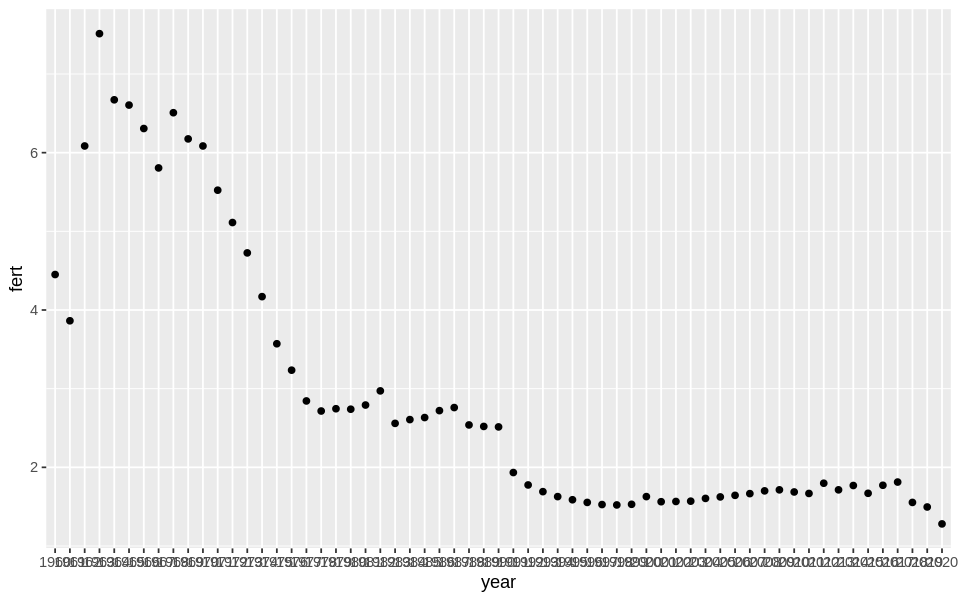

In [59]:
wb_longer %>% ggplot(aes(x=`year`, y= `fert`)) +
  geom_point()+
  geom_line()

In [63]:
wb_longer$year <- parse_number(wb_longer$year)

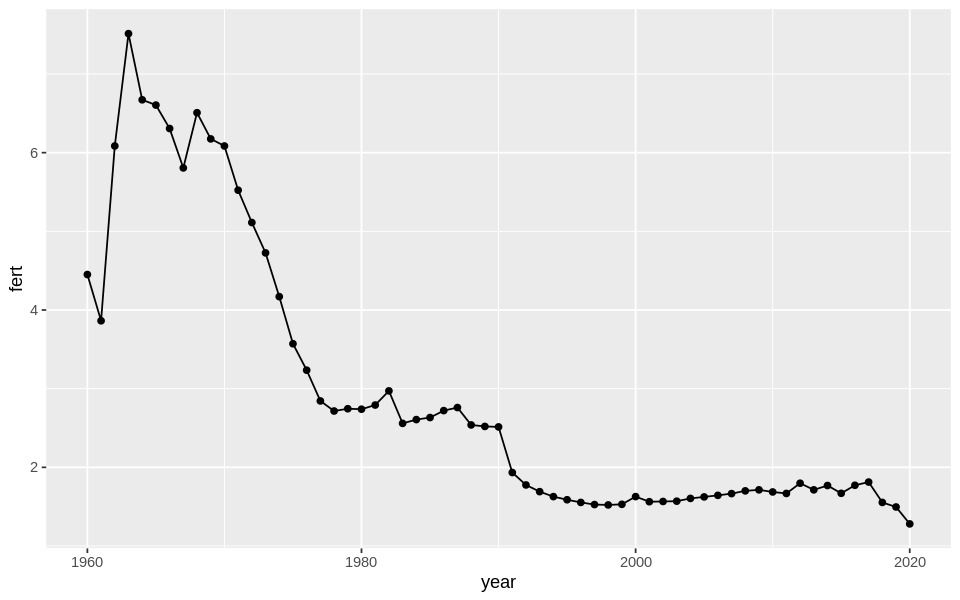

In [64]:
wb_longer %>% ggplot(aes(x=`year`, y= `fert`)) +
  geom_point()+
  geom_line()